In [1]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
basepath = './'
pickle_files = [basepath + n for n in  os.listdir(basepath) if '.pkl' in n]

In [3]:
def open_report(pickle_file, verbose=True):
    with open(pickle_file, 'br') as f:
        report = pickle.load(f)

    if verbose:
        print('\nfile_name: {}\nmodel:{}'.format(pickle_file, report['model']))
    
    return report


In [4]:
#for fname in pickle_files:
#    open_report(fname)
def analyse_report(report):
    print('Model:', report.get('model_name', ['model']))
    print('lrange:', report['lrange'])
    #print('Model size:', report['model_size'])
    #print('Model size:', report['model_name'])
    
    x = report['df_train']['epoch']
    jtrain = report['df_train']['loss_avg']
    jval = report['df_test']['loss_avg']

    plt.figure()
    plt.plot(x, np.log(jtrain), label='Train')
    plt.plot(x, np.log(jval), label='Val')

    plt.ylabel('custo')
    plt.xlabel('época')
    plt.legend()


    plt.figure()
    for k in range(5):
        y = report['df_test']['acc_{}'.format(k)]
        plt.plot(x, y, label='i={}'.format(k))

    plt.ylabel('acurácia')
    #plt.ylim([0,1])
    plt.xlabel('época')
    plt.legend()


    plt.figure()
    for k in range(5):
        y = report['df_test']['loss_{}'.format(k)]
        plt.plot(x, y, label='i={}'.format(k))

    plt.ylabel('custo')
    plt.xlabel('época')
    plt.legend()


    wacc = report['df_test']['wacc']
    wprob = report['df_test']['wprob']

    plt.figure()
    plt.plot(x, wacc, label='acc')
    plt.plot(x, wprob, label='prob')
    plt.xlabel('época')
    plt.legend()


    train_time_series = report['df_test']['train_time'][1:]
    print('train time:')
    print('sum: {} estimative: {} +- {}'.format(train_time_series.sum(), train_time_series.mean(), train_time_series.std()))


    total_time_series = report['df_test']['total_time'][1:]
    print('total time:')
    print('sum: {} estimative: {} +- {}'.format(total_time_series.sum(), total_time_series.mean(), total_time_series.std()))



Model: C5s2o6C5s2o12C5s2o36C5s2o12MaxRfl100MchD
lrange: (0.001, 0.001)
train time:
sum: 5220.625437498093 estimative: 522.0625437498093 +- 0.3819206284576783
total time:
sum: 5944.02605009079 estimative: 594.402605009079 +- 0.38566788827107384
Model: C5s6C5s12MaxRMchD
lrange: (1e-05, 1e-05)
train time:
sum: 4079.629566192627 estimative: 407.9629566192627 +- 0.4453479134525838
total time:
sum: 4737.318004369736 estimative: 473.7318004369736 +- 0.443886340688194
Model: C5s2o6C5s2o12C5s2o36C5s2o12MaxRMchD
lrange: (0.1, 0.1)
train time:
sum: 5187.982225656509 estimative: 518.7982225656509 +- 0.25862831698072525
total time:
sum: 5913.345445632935 estimative: 591.3345445632934 +- 0.27152278536618063
Model: C5s6C5s12MaxRMchD
lrange: (0.0001, 0.0001)
train time:
sum: 4062.562459230423 estimative: 406.2562459230423 +- 0.2576392078568308
total time:
sum: 4720.571240663528 estimative: 472.05712406635286 +- 0.248900203303686
Model: C5s2o6C5s2o12C5s2o36C5s2o12MaxRfl100MchD
lrange: (0.0001, 0.0001)


/home/diogo/.virtualenvs/tensorgpu/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


train time:
sum: 4814.582678556442 estimative: 481.45826785564424 +- 0.6724481273223408
total time:
sum: 5410.271639823914 estimative: 541.0271639823914 +- 0.6804531818633904
Model: C5s2o6C5s2o12C5s2o36C5s2o12MaxRMchD
lrange: (0.001, 0.001)
train time:
sum: 5194.646281957626 estimative: 519.4646281957627 +- 0.2299442920344682
total time:
sum: 5920.323387861252 estimative: 592.0323387861251 +- 0.23196583434835005
Model: C5s6C5s12MaxRMchD
lrange: (0.1, 0.1)
train time:
sum: 4047.481304168701 estimative: 404.74813041687014 +- 0.1744568761222204
total time:
sum: 4708.538771390915 estimative: 470.8538771390915 +- 0.1057660863228611
Model: C5s6C5s12MaxRfl100MchD
lrange: (0.1, 0.1)
train time:
sum: 4789.80934548378 estimative: 478.980934548378 +- 0.1589755418349751
total time:
sum: 5385.177874803543 estimative: 538.5177874803543 +- 0.16117351611306352
Model: C5s6C5s12MaxRfl100MchD
lrange: (1e-05, 1e-05)
train time:
sum: 4830.007758140564 estimative: 483.0007758140564 +- 0.20222677849816462
to

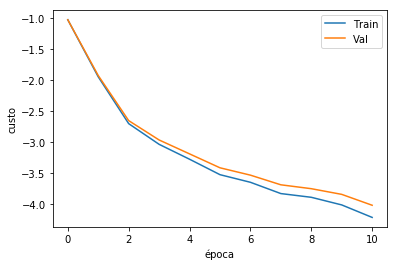

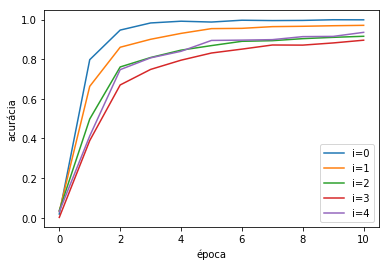

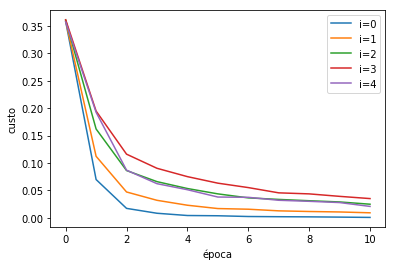

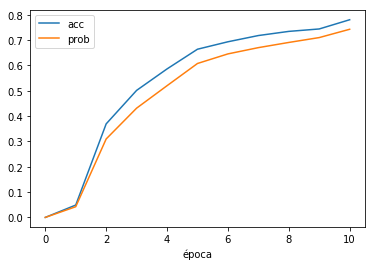

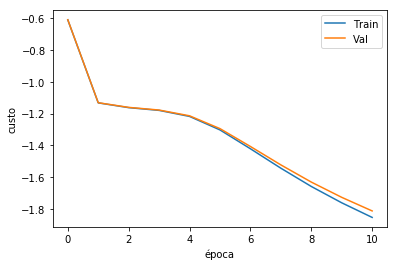

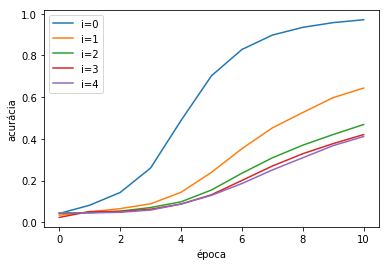

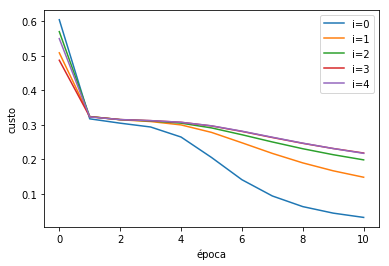

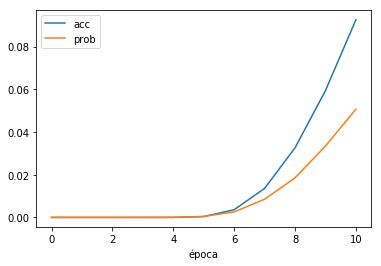

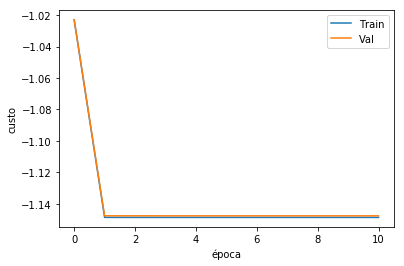

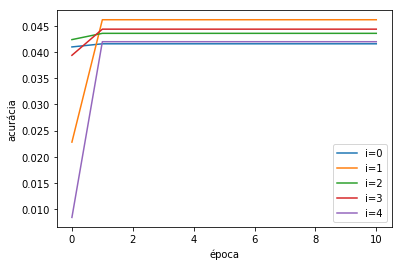

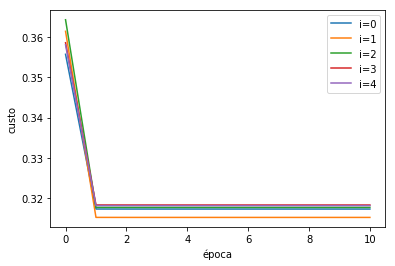

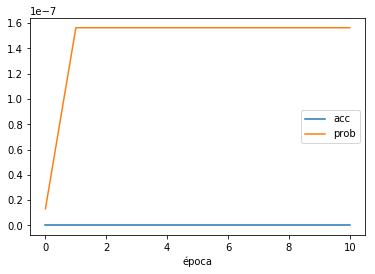

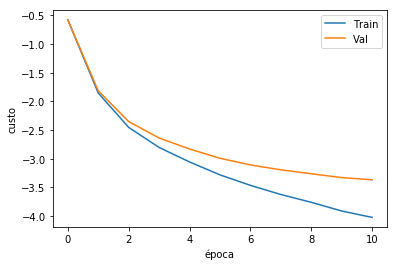

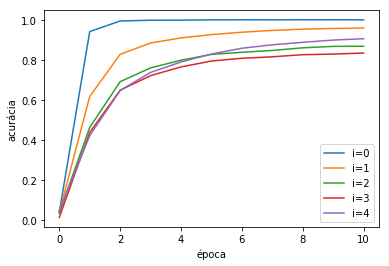

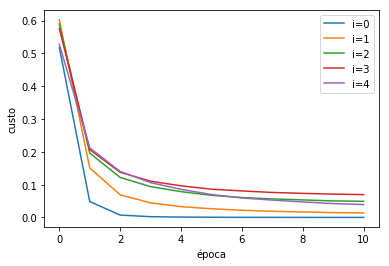

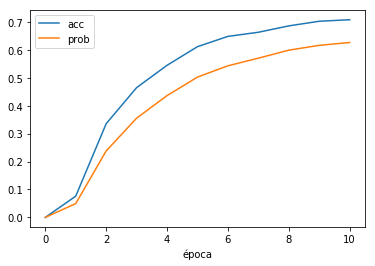

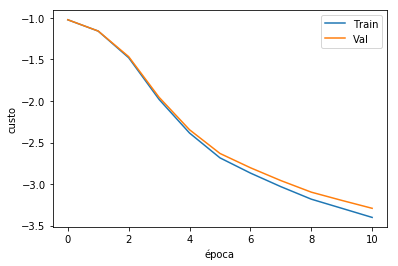

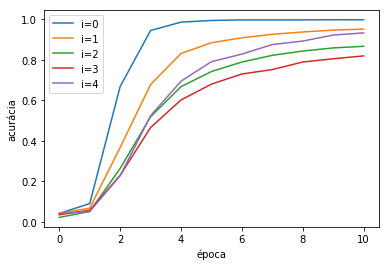

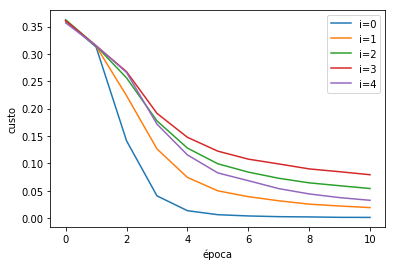

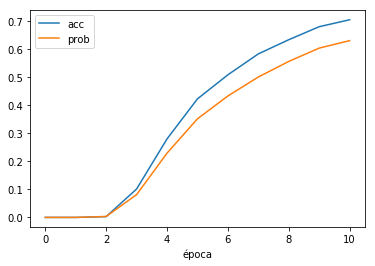

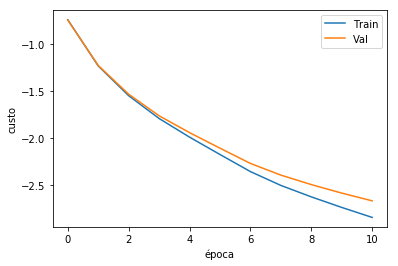

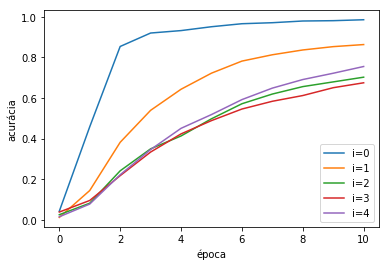

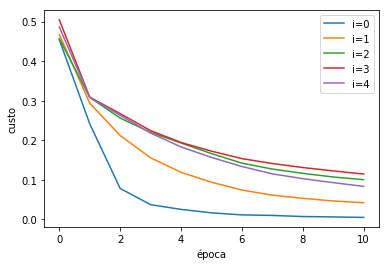

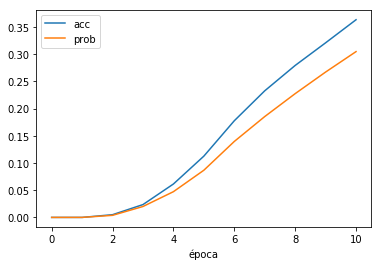

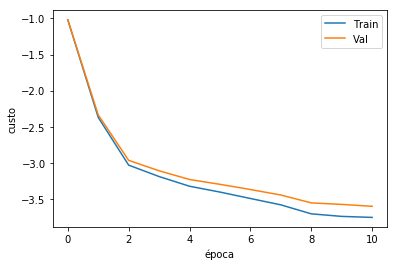

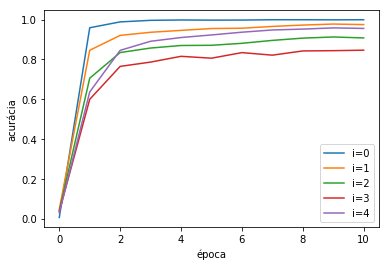

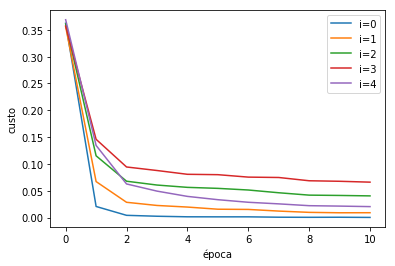

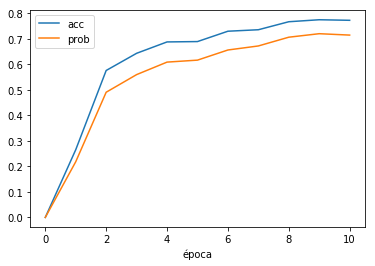

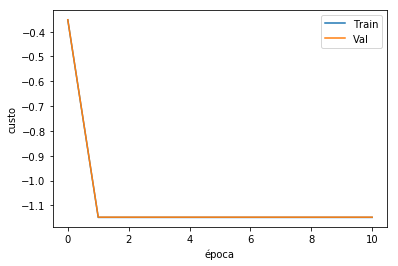

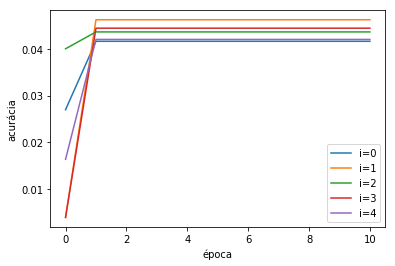

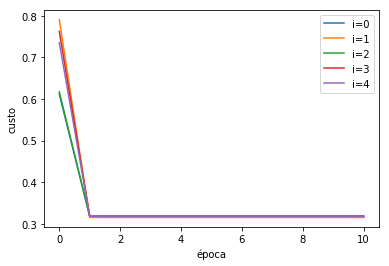

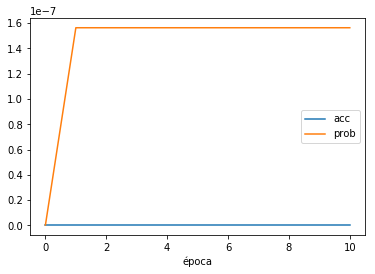

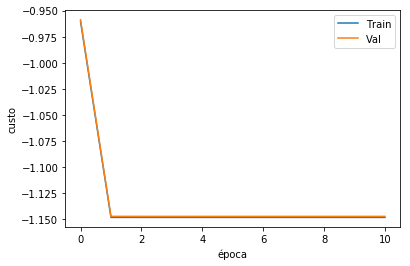

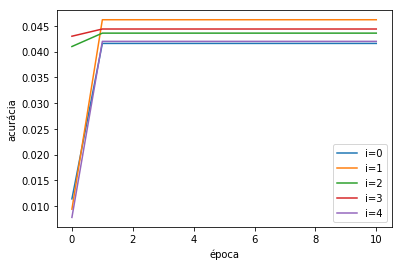

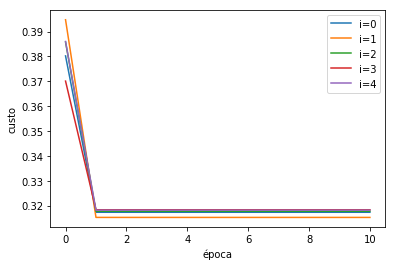

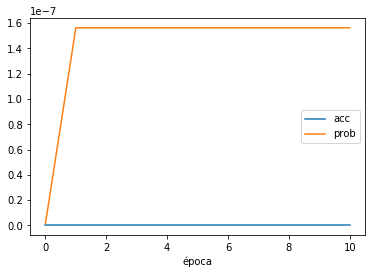

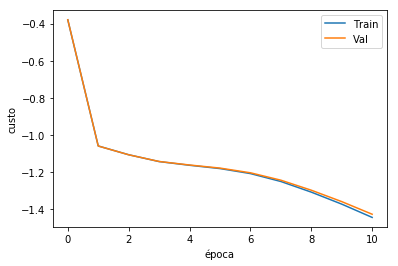

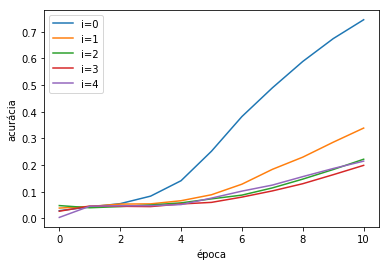

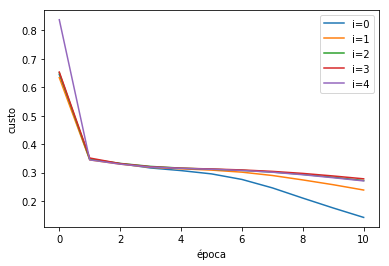

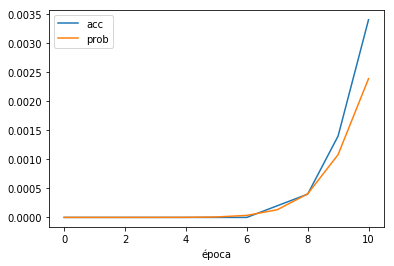

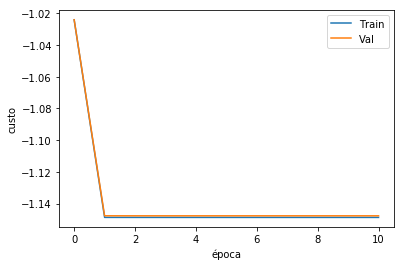

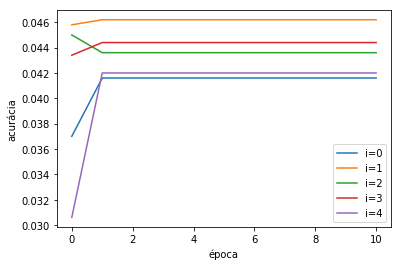

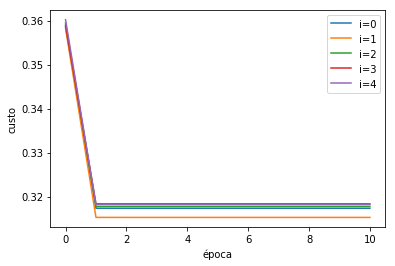

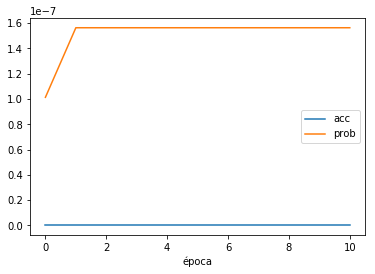

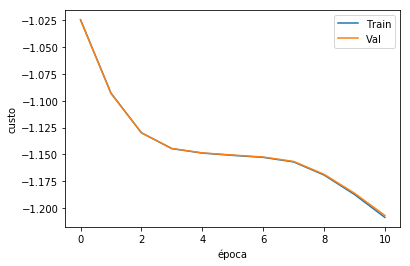

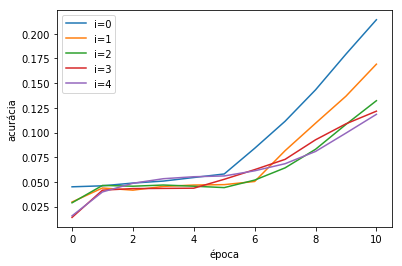

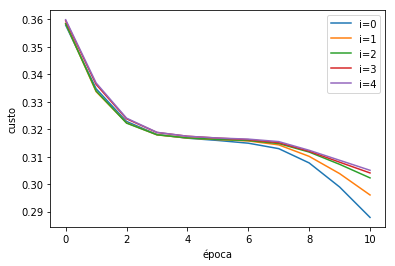

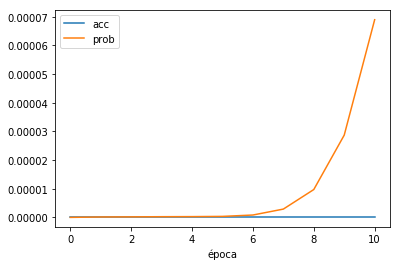

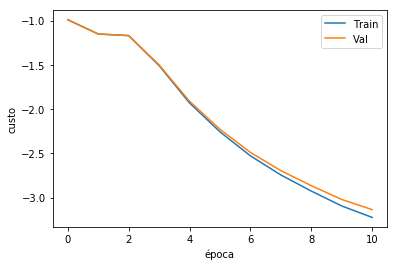

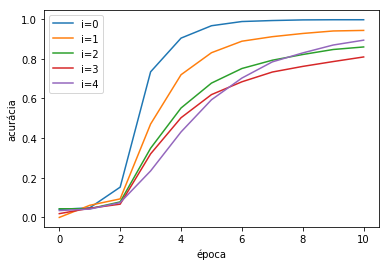

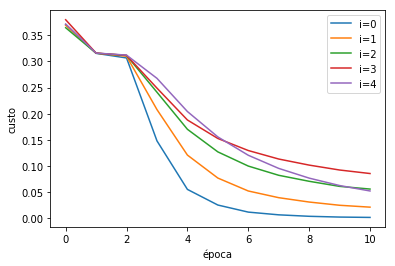

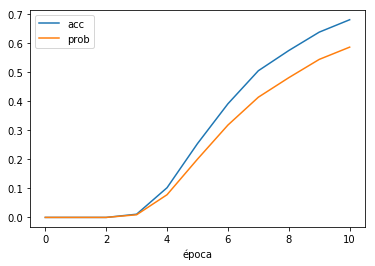

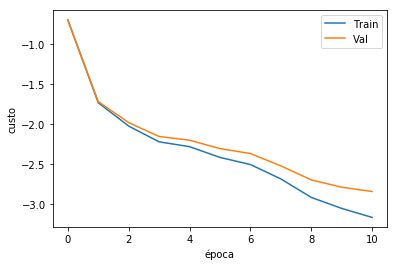

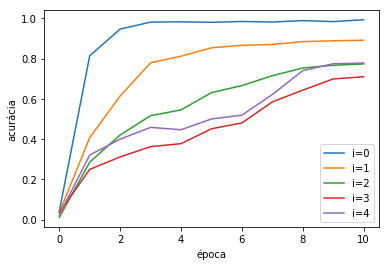

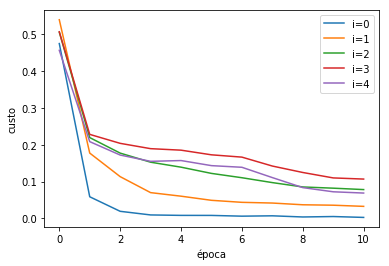

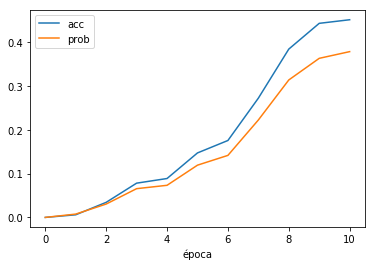

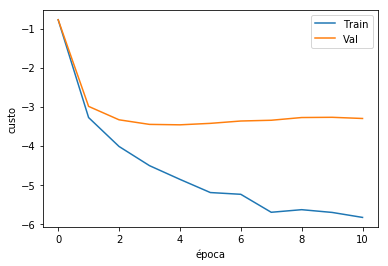

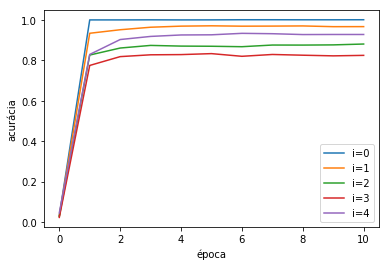

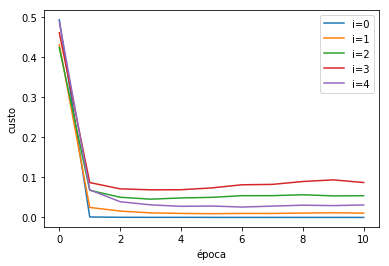

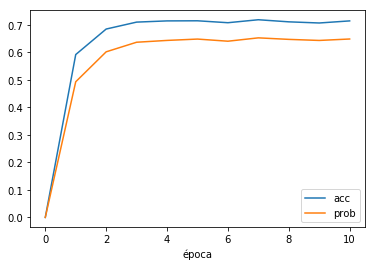

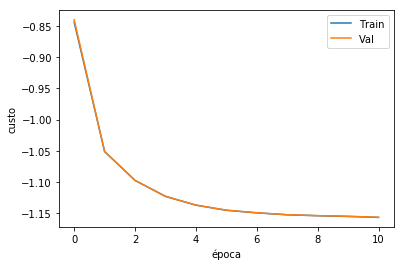

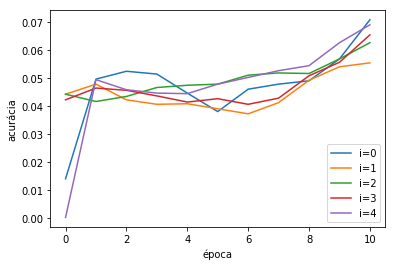

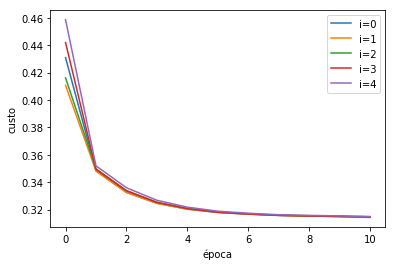

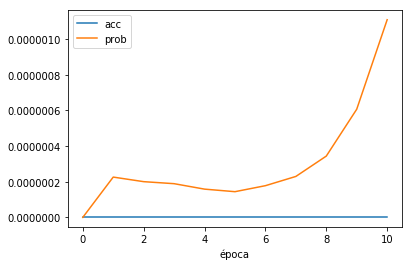

In [6]:
basepath = './'
pickle_files = [basepath + n for n in  os.listdir(basepath) if '.pkl' in n]
for fname in pickle_files:
    report = open_report(fname, verbose=False)
    analyse_report(report)